In [3]:
##take intensities
from idXML2df import readAndProcessIdXML
import pandas as pd
from scipy.stats import pearsonr
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [4]:
NM_S30_9_df = pd.read_csv("NM_S30_9.csv")
NM_S30_8_df = pd.read_csv("NM_S30_8.csv")
NM_S30_7_df = pd.read_csv("NM_S30_7.csv")
NM_S100_6_df = pd.read_csv("NM_S100_6.csv")

NM = pd.concat([
                NM_S30_9_df, 
                NM_S30_8_df,
                NM_S30_7_df,
                NM_S100_6_df,
                ], ignore_index=True)
                
NM["catagory"] = "NM"

DEB_S30_9_df = pd.read_csv("DEB_S30_9.csv")
DEB_S30_8_df = pd.read_csv("DEB_S30_8.csv")

DEB = pd.concat([
                DEB_S30_8_df, 
                DEB_S30_9_df
                ], ignore_index=True)

DEB["catagory"] = "DEB"

UV_S30_9_df = pd.read_csv("UV_S30_9.csv")
UV_S100_9_df = pd.read_csv("UV_S100_9.csv")
UV_S100_10_df = pd.read_csv("UV_S100_10.csv")

UV = pd.concat([
                UV_S30_9_df, 
                UV_S100_9_df,
                UV_S100_10_df,
                ], ignore_index=True)

UV["catagory"] = "UV"

_4SU_SAX_df = pd.read_csv("_4SU_SAX_.csv")
_4SU_Qisi_df = pd.read_csv("_4SU_Qisi_.csv")

_4SU = pd.concat([
                _4SU_SAX_df, 
                _4SU_Qisi_df
                ], ignore_index=True)

_4SU["catagory"] = "4SU"

result_df = pd.concat([
                       NM,
                       DEB,
                       UV,
                       _4SU,
                       ], ignore_index=True)

result_df ["max_b_y(3-prefix/suffix)"].max()

result_df["All ions"] = result_df["max_b_y(All)"]
result_df["Three prefix-/suffix ions"] = result_df["max_b_y(3-prefix/suffix)"]

/tmp/ipykernel_770732/1637397290.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)


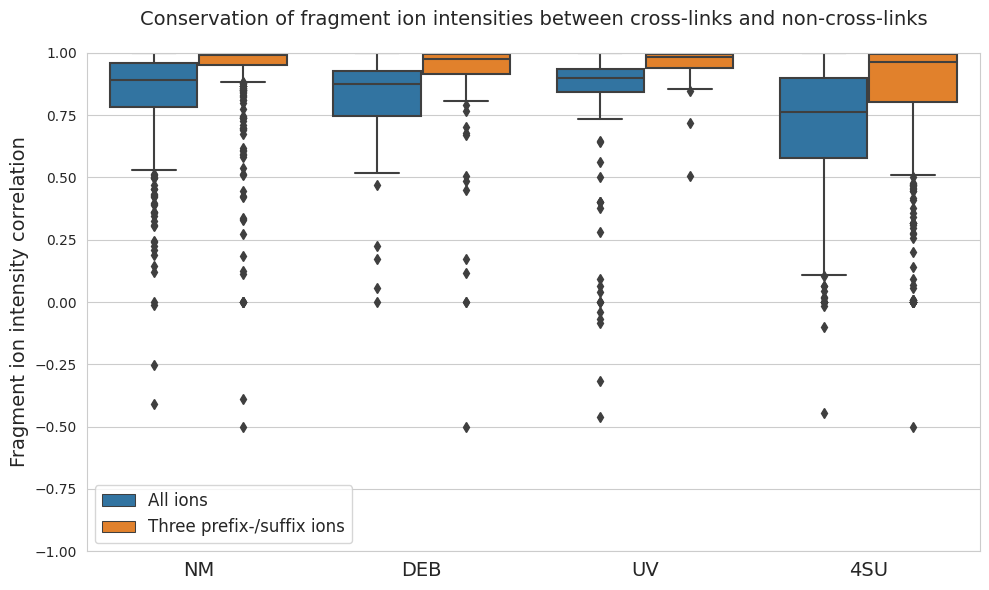

In [5]:

# Set the Seaborn style
sns.set_style("whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

# Combine the two columns for plotting
combined_data = pd.melt(result_df, id_vars=["catagory"], value_vars=["All ions", "Three prefix-/suffix ions"])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)

# Create a grouped bar plot
sns.boxplot(x="catagory", y="value", hue="variable", data=combined_data, ax=ax)#, palette=palette)

# Customize labels, title, and legend
#ax.set_xlabel("RNA protocols")
ax.set_ylim(-1.0, 1.0)
ax.set_xlabel("")
ax.set_ylabel("Fragment ion intensity correlation", fontsize=14)
ax.set_title("Conservation of fragment ion intensities between cross-links and non-cross-links", fontsize=14, pad=20)
ax.legend(fontsize=12)
# Show the plot
plt.tight_layout()
plt.savefig('boxplot_group_final.pdf', bbox_inches='tight')
plt.show()